In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Raushan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('data_preprocessed.csv')

In [3]:
train['date'] = pd.to_datetime(train['date'])
train = train.set_index('date')

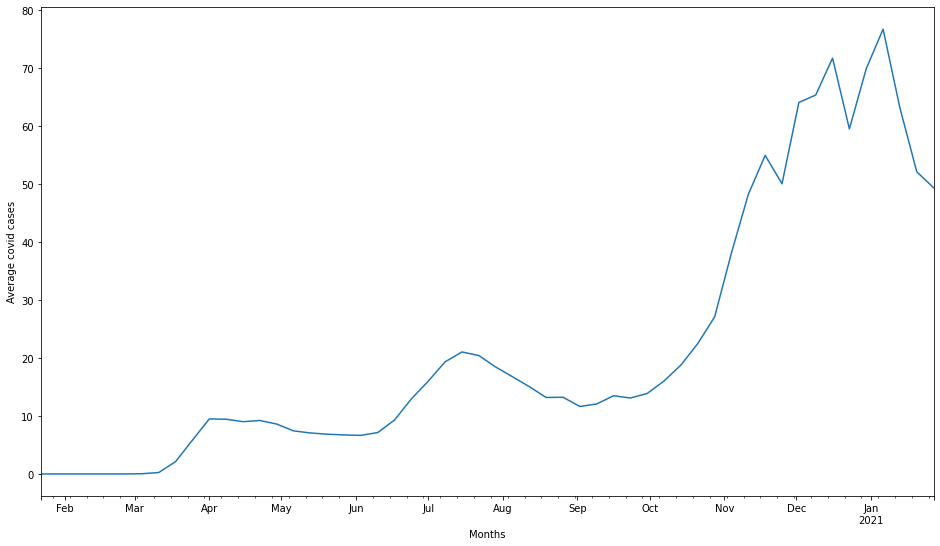

In [40]:
#Average covid patients monthly plot
plt.figure(figsize=(16,9))
cases = train.groupby('date')['target'].mean()
cases.resample('7D').mean().plot()
plt.xlabel('Months')
plt.ylabel('Average covid cases')
plt.show()

Since it is a epidemic, this curve should be normally distributed and after looking the above curve we can assume that the peak of the epidemic will reach in Jan-feb 2021 in US, then it will start decreasing

# Let's analysize the data state-wise 

In [27]:
state_wise_data = train.groupby('stateFIPS')
covid_upto_jan = {}
total_pop = {}
for state in train['stateFIPS'].unique():
    df = state_wise_data.get_group(state)
    #print(df.groupby('date')['confirmed_cases'].sum()['2021-01-30'])
    covid_upto_jan[state] = df.groupby('date')['confirmed_cases'].sum()['2021-01-30']
    total_pop[state] = covid_upto_jan[state]/(df['C_TOT_POP'].unique().sum())

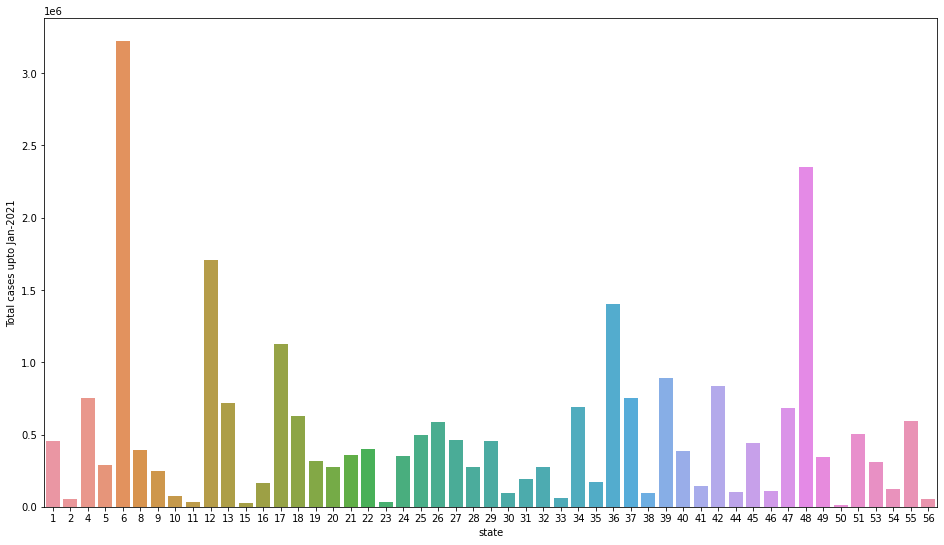

In [24]:
plt.figure(figsize=(16,9))
state = list(covid_upto_jan.keys())
cases = list(covid_upto_jan.values())
sns.barplot(x=state,y=cases)
plt.xlabel('state')
plt.ylabel('Total cases upto Jan-2021')
plt.show()

We can see that the states like 6,48,12,36,17 are the most effected states with maximum number of patients


Let's see the effected population percentage data to understand better

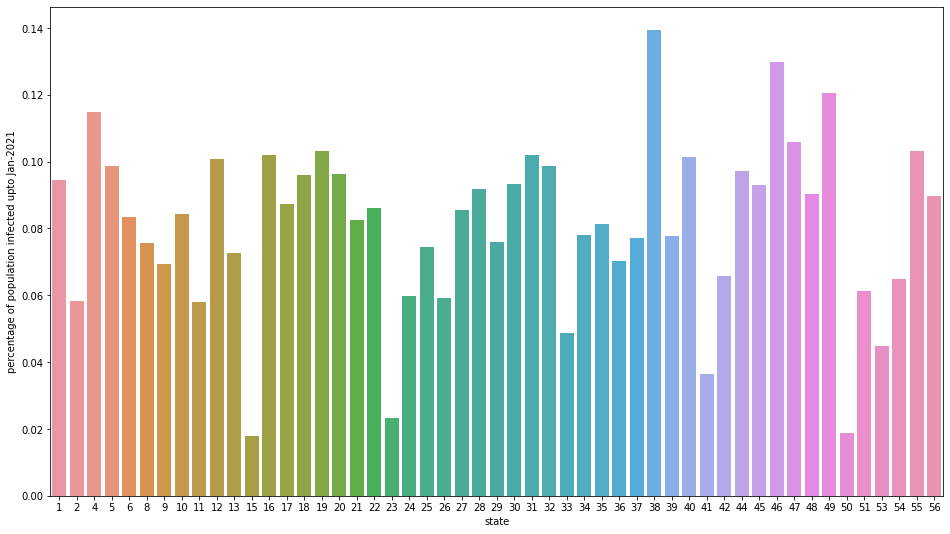

In [29]:
plt.figure(figsize=(16,9))
state = list(covid_upto_jan.keys())
percentage_cases = list(total_pop.values())
sns.barplot(x=state,y=percentage_cases)
plt.xlabel('state')
plt.ylabel('percentage of population infected upto Jan-2021')
plt.show()

In [34]:
dict(sorted(total_pop.items(), key=lambda item: item[1]))

{15: 0.017992362349557894,
 50: 0.018886249602642766,
 23: 0.023415729255066235,
 41: 0.03634679907153828,
 53: 0.04496947373732277,
 33: 0.04870078245318077,
 11: 0.0579798615580961,
 2: 0.05817832579292898,
 26: 0.05911572582603487,
 24: 0.05994089960460955,
 51: 0.06139693832555227,
 54: 0.06485887508603205,
 42: 0.06575286033588185,
 9: 0.06940861147961465,
 36: 0.0703947153479942,
 13: 0.07252570452759567,
 25: 0.07435078144560214,
 8: 0.07580131432574215,
 29: 0.07601791966373896,
 37: 0.07716523450962683,
 39: 0.07761734374199891,
 34: 0.07799232677427834,
 35: 0.0814600357317872,
 21: 0.0824385360747783,
 6: 0.08331363187228383,
 10: 0.08436340083655729,
 27: 0.08559380971564408,
 22: 0.08623864135911026,
 17: 0.08728091210620682,
 56: 0.08969972866630119,
 48: 0.09023234517187652,
 28: 0.09185822362095408,
 45: 0.09310135247134517,
 30: 0.09328243500165648,
 1: 0.09447943321713728,
 18: 0.09611548071430953,
 20: 0.09617156489905246,
 44: 0.0971596470314922,
 32: 0.098728819241

So here we found that states like 38,46,49,4,47,19 are the ones where highest percentage of effected population
And the states like 15,50,23,41,53,etc are the ones where lowest percentage of effected population

# Identification of top 5 states which is worst affected by COVID-19 by april 30

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Raushan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Loading the data
pred_data = pd.read_csv("pred_upto_april.csv")

In [4]:
pred_data = pred_data.drop('Unnamed: 0',axis=1)

In [5]:
pred_data

,Date,State,Cases,Deaths,Recovery,Infected
0,2020-01-21,1,1,0,0,1
1,2020-01-22,1,1,0,0,0
2,2020-01-23,1,1,0,0,0
3,2020-01-24,1,1,0,0,0
4,2020-01-25,1,1,0,0,0
...,...,...,...,...,...,...
23761,2021-04-26,56,354671,750,351756,599
23762,2021-04-27,56,354770,751,351922,580
23763,2021-04-28,56,354866,751,352083,562
23764,2021-04-29,56,354959,752,352239,545


In [6]:
#grouping by state
pred_by_state = pred_data.groupby('State')
total_state = pred_data['State'].unique()

In [7]:
train = pd.read_csv('data_preprocessed.csv')
state_wise_data = train.groupby('stateFIPS')

#Creating a dictionary of population of states where key is state code and value is it's population
state_pop = {}
for state in total_state:
    df = state_wise_data.get_group(state)
    total_pop = df['C_TOT_POP'].unique().sum()
    state_pop[state] = total_pop

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 1


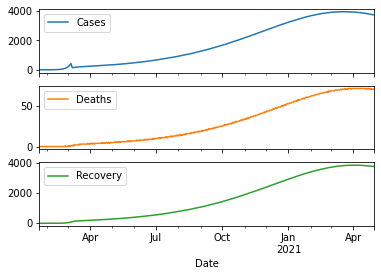

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 2


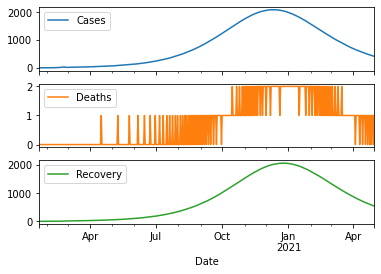

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 4


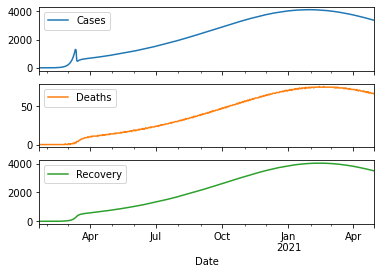

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 5


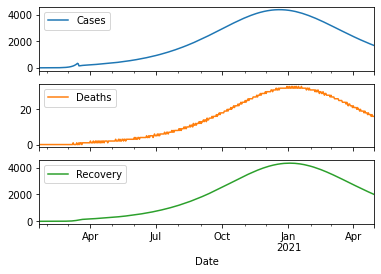

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 6


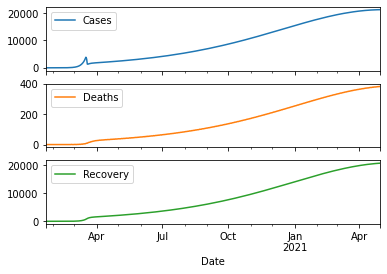

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 8


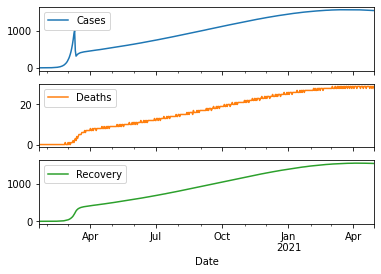

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 9


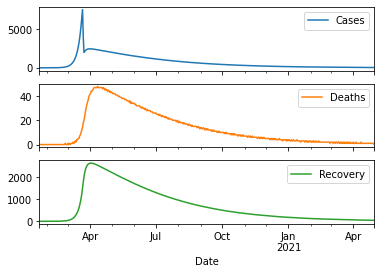

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 10


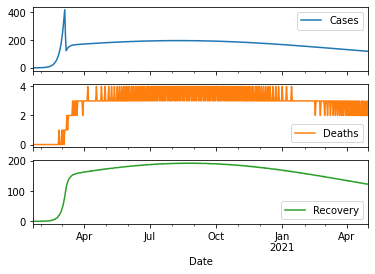

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 11


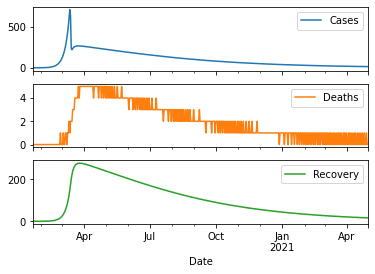

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 12


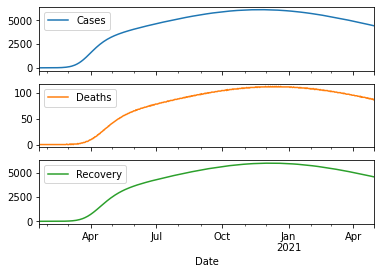

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 13


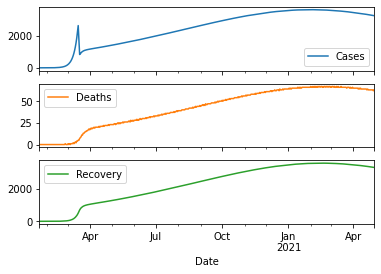

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 15


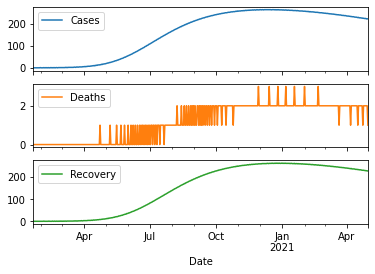

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 16


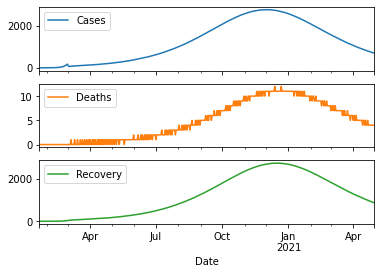

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 17


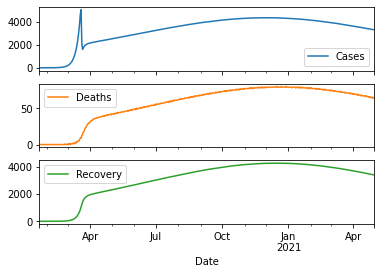

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 18


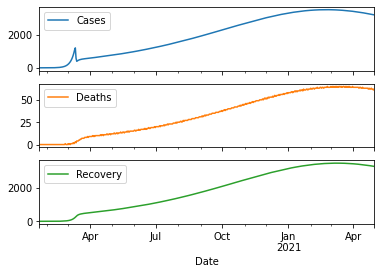

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 19


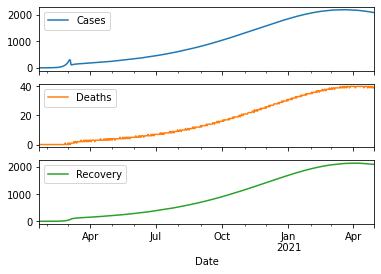

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 20


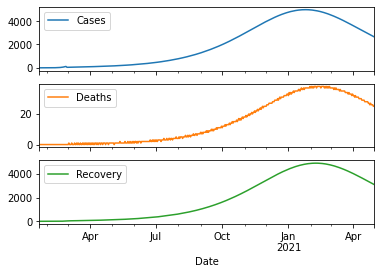

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 21


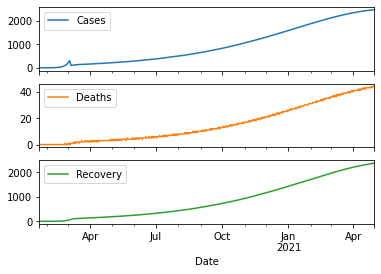

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 22


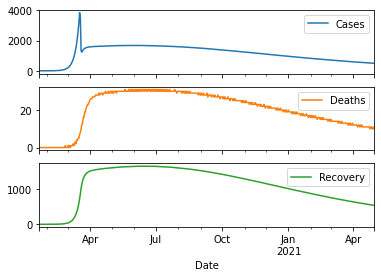

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 23


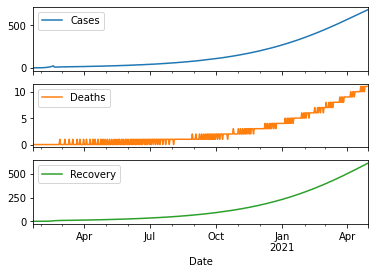

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 24


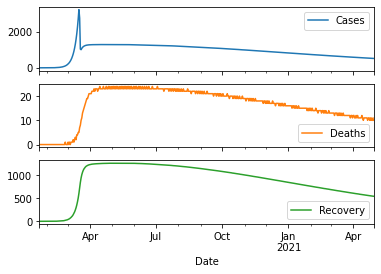

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 25


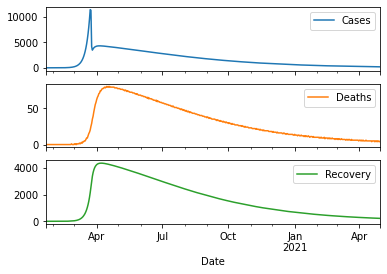

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 26


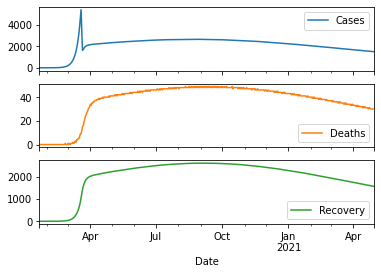

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 27


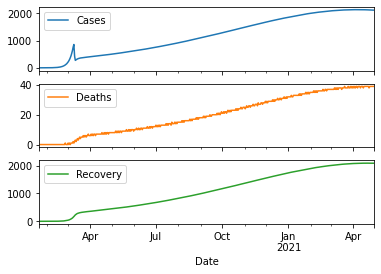

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 28


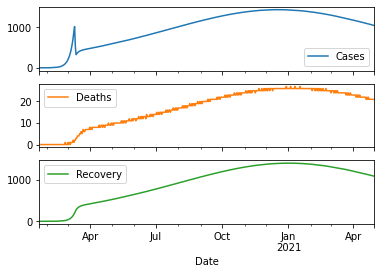

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 29


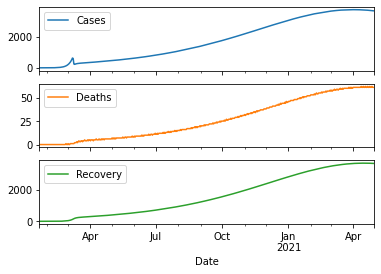

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 30


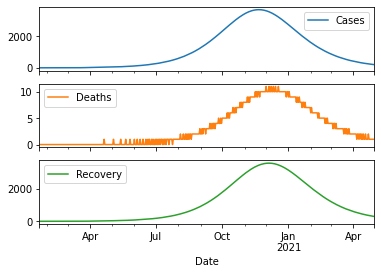

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 31


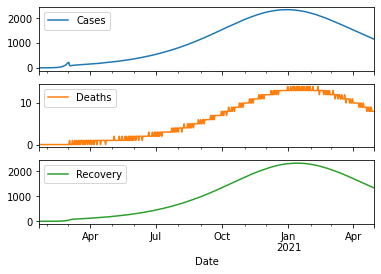

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 32


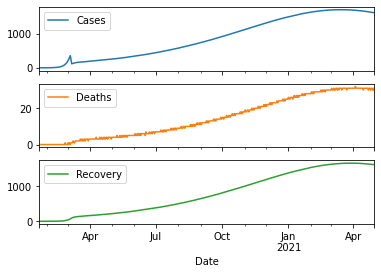

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 33


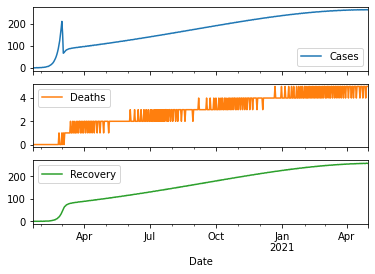

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 34


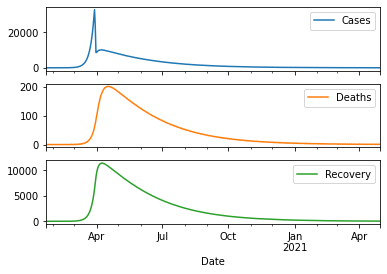

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 35


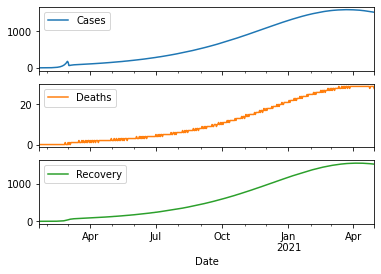

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 36


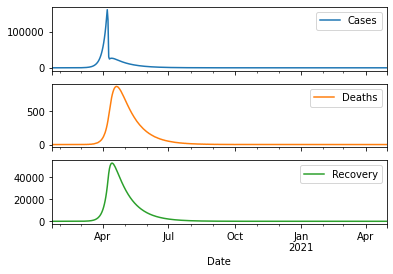

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 37


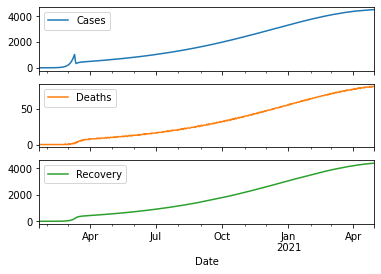

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 38


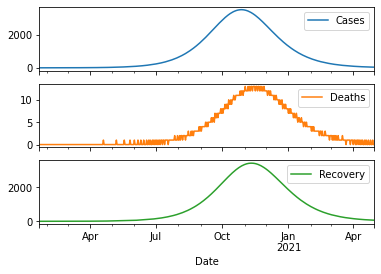

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 39


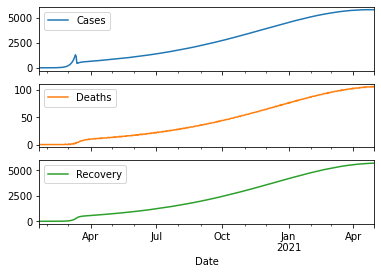

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 40


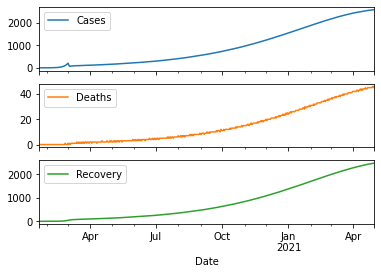

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 41


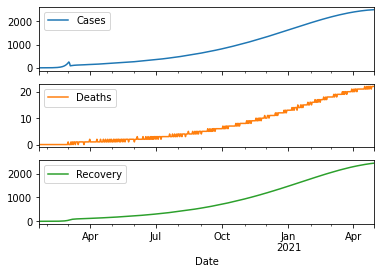

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 42


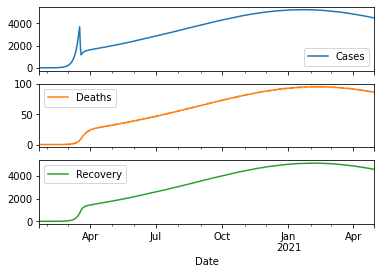

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 44


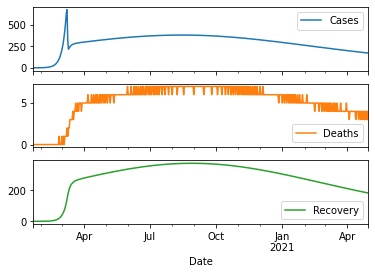

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 45


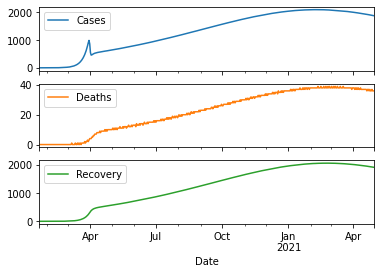

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 46


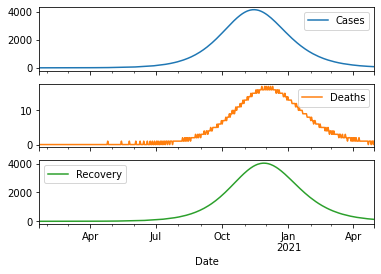

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 47


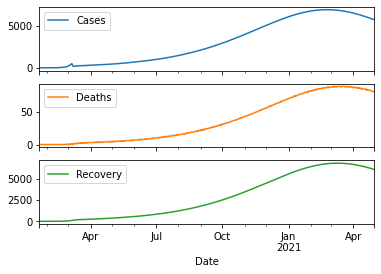

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 48


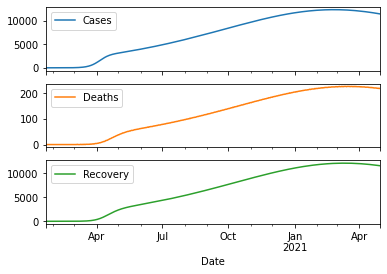

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 49


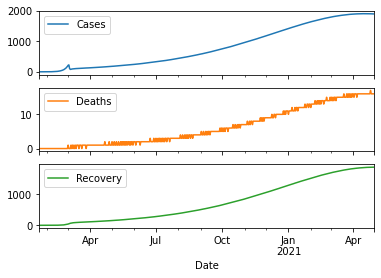

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 50


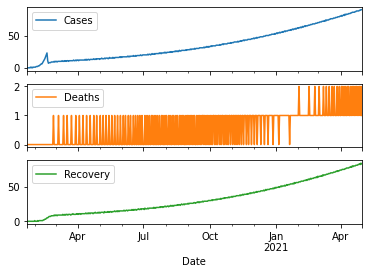

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 51


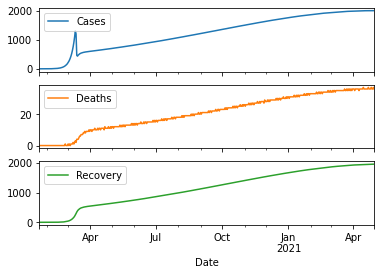

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 53


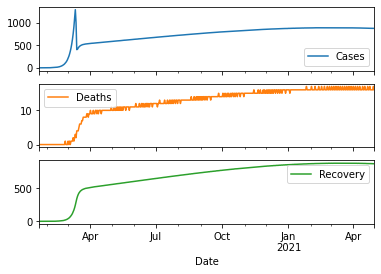

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 54


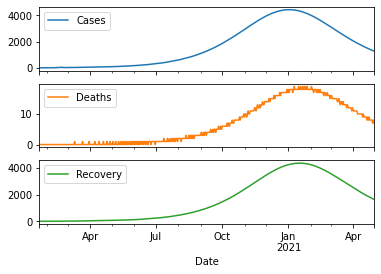

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 55


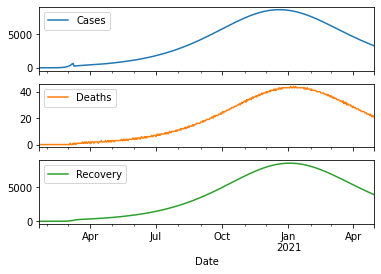

C:\Users\Raushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


stateFIPS Code 56


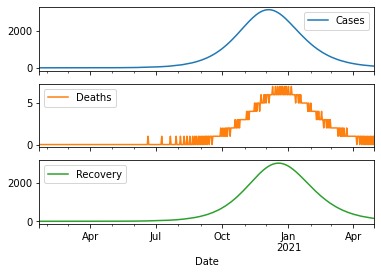

In [12]:
#Saving the following data upto april in a list
active_cases = []
total_cases = []
recovered_cases = []
deaths = []
per_pop_infected = []
per_recovery = []

for states in total_state:
    df = pred_by_state.get_group(states)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    active_cases.append(df['Infected'].iloc[-1])
    total_cases.append(df['Cases'].iloc[-1])
    recovered_cases.append(df['Recovery'].iloc[-1])
    deaths.append(df['Deaths'].iloc[-1])
    per_pop_infected.append((df['Cases'].iloc[-1]/state_pop[states])*100)
    per_recovery.append((df['Recovery'].iloc[-1]/df['Cases'].iloc[-1])*100)
    print("stateFIPS Code {}".format(states))
    df[['Cases','Deaths','Recovery']].diff().plot(subplots=True)
    plt.show()

In [31]:
import pickle

file = open('State Name-Code.pkl','rb')
state_name_dict = pickle.load(file) #Loading the dictionary of state name vs code
state_name = [state_name_dict[x] for x in total_state]

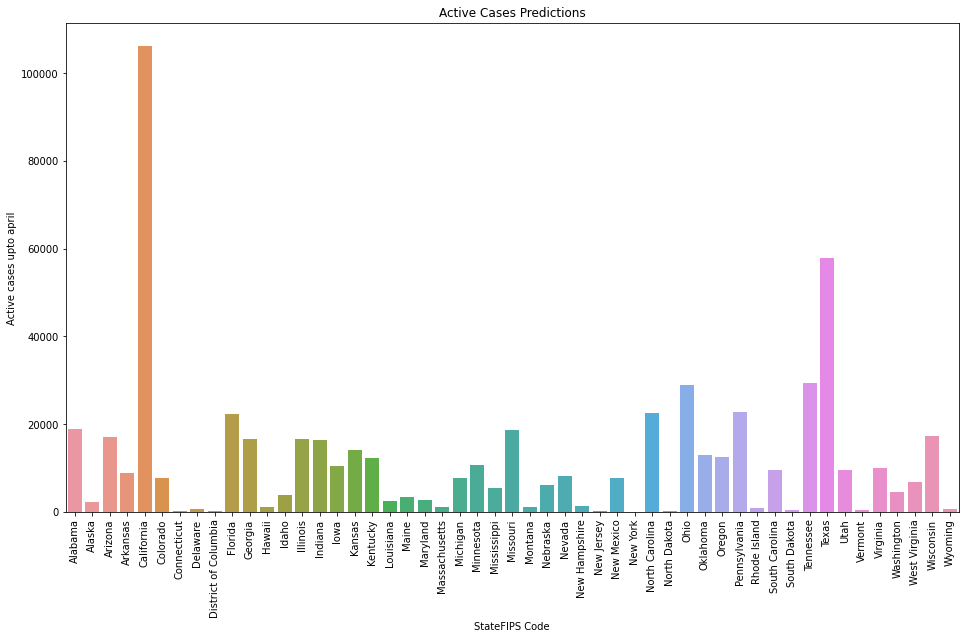

In [34]:
#Visualizing the active cases in april accordint to our predictions
plt.figure(figsize=(16,9))
sns.barplot(x=state_name,y=active_cases)
plt.xticks(rotation='vertical')
plt.xlabel('StateFIPS Code')
plt.ylabel("Active cases upto april")
plt.title("Active Cases Predictions")
plt.show()

States like california, Texas, Florida, Tennessee, ohio, etc are the states with highest number of active cases upto april

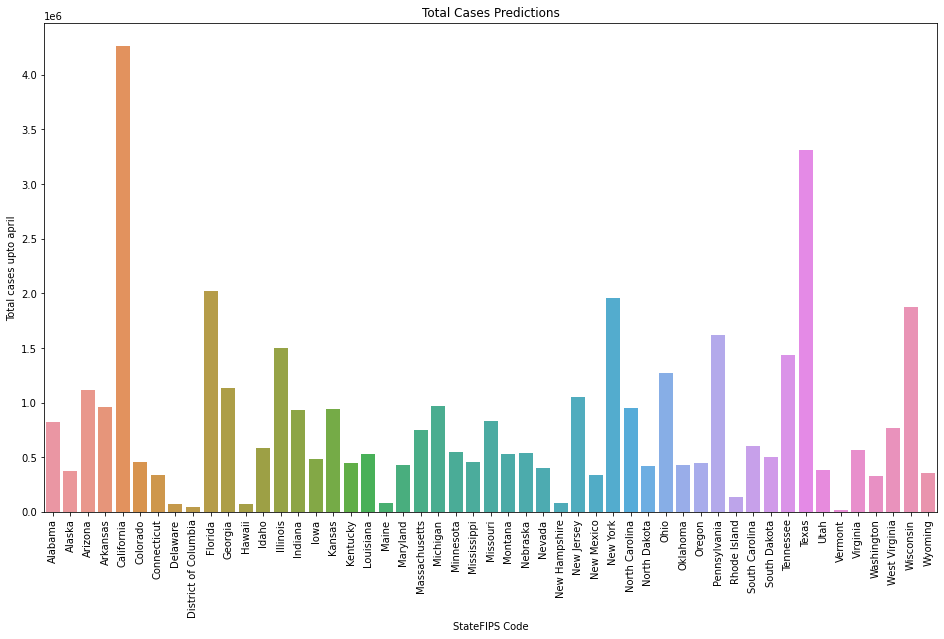

In [35]:
#Visualizing the total cases upto april
plt.figure(figsize=(16,9))
sns.barplot(x=state_name,y=total_cases)
plt.xticks(rotation='vertical')
plt.xlabel('StateFIPS Code')
plt.ylabel("Total cases upto april")
plt.title("Total Cases Predictions")
plt.show()

We can see that states like california, florida, Texas, New York, Pennsylvania, Illinois, Wisconsin are the states with highest number of total cases upto april

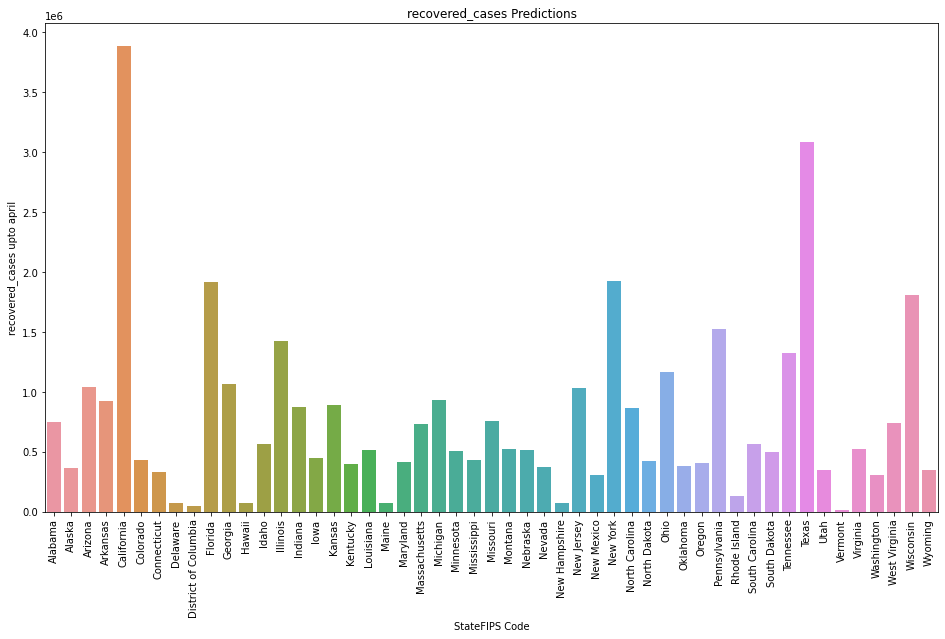

In [36]:
#Visualizing total recovered_cases utpo april
plt.figure(figsize=(16,9))
sns.barplot(x=state_name,y=recovered_cases)
plt.xticks(rotation='vertical')
plt.xlabel('StateFIPS Code')
plt.ylabel("recovered_cases upto april")
plt.title("recovered_cases Predictions")
plt.show()

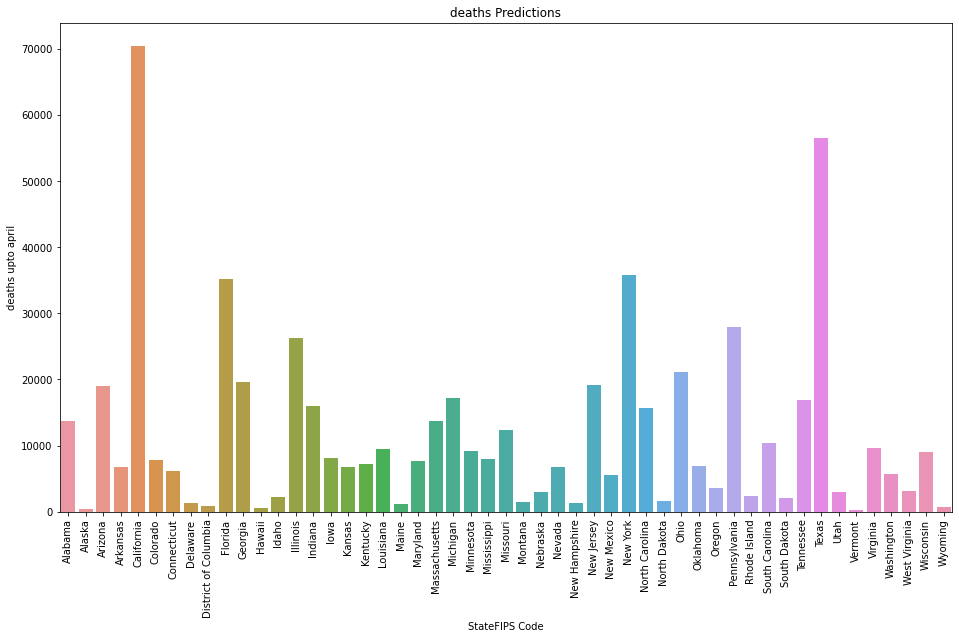

In [37]:
#Visualizing the deaths of each state upto april 
plt.figure(figsize=(16,9))
sns.barplot(x=state_name,y=deaths)
plt.xticks(rotation='vertical')
plt.xlabel('StateFIPS Code')
plt.ylabel("deaths upto april")
plt.title("deaths Predictions")
plt.show()

We can see that states like california, florida, Texas, New York, Pennsylvania, Illinois, Ohio are the states with highest number of deaths upto april

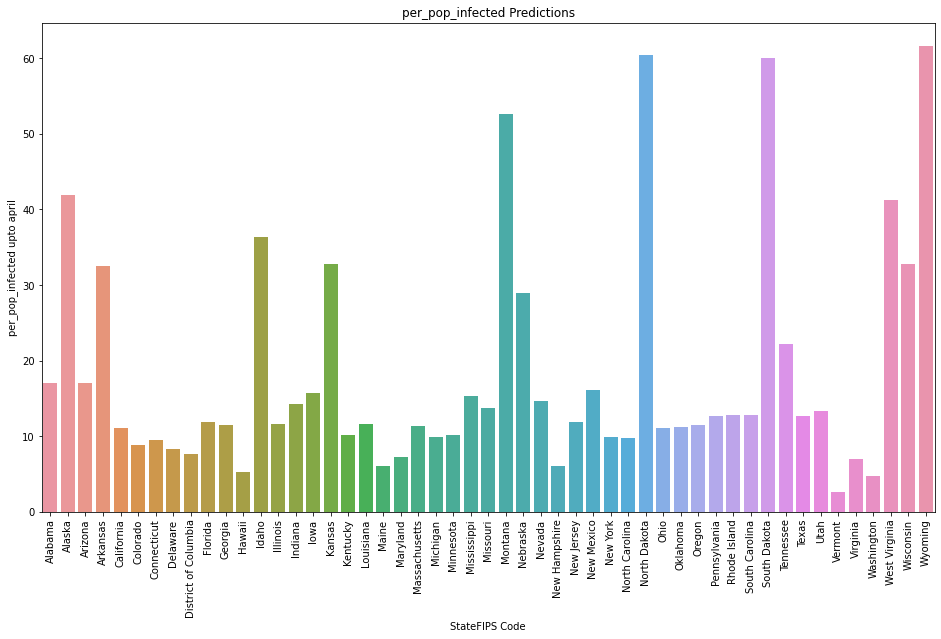

In [38]:
plt.figure(figsize=(16,9))
sns.barplot(x=state_name,y=per_pop_infected)
plt.xticks(rotation='vertical')
plt.xlabel('StateFIPS Code')
plt.ylabel("per_pop_infected upto april")
plt.title("per_pop_infected Predictions")
plt.show()

We can see that the total cases and the maximum percentage of population infected are very different,

States like Wyoming, South Dakota, North Dakota, Montana, West Virginia Alaska, etc are the states in which highest percentage of people infected due to covid-19

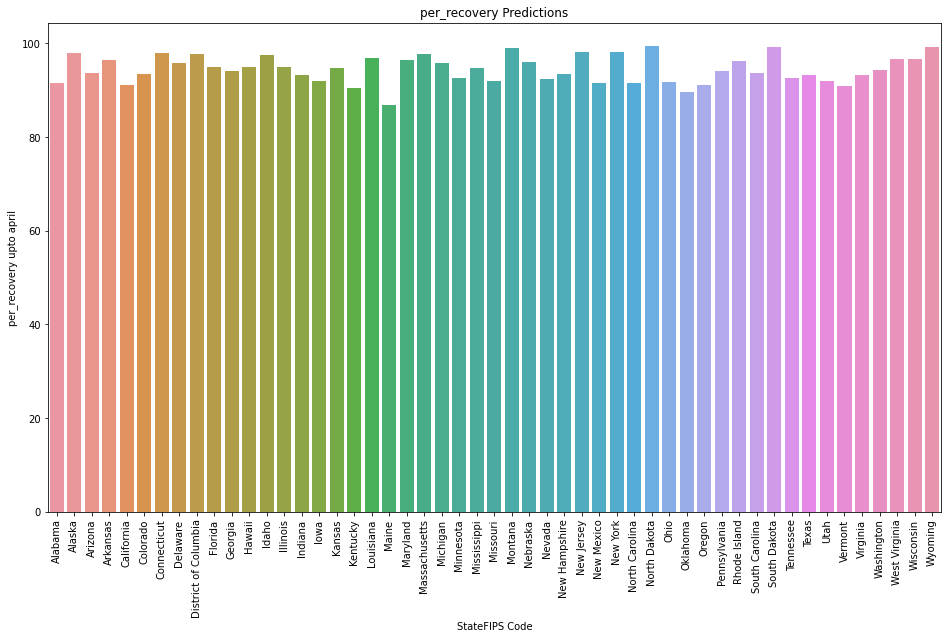

In [39]:
plt.figure(figsize=(16,9))
sns.barplot(x=state_name,y=per_recovery)
plt.xticks(rotation='vertical')
plt.xlabel('StateFIPS Code')
plt.ylabel("per_recovery upto april")
plt.title("per_recovery Predictions")
plt.show()

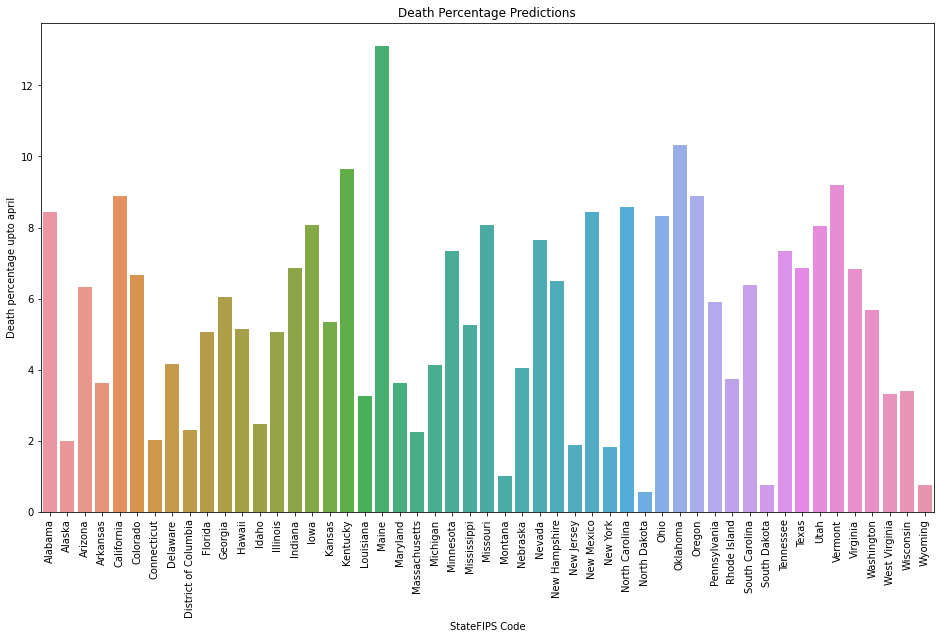

In [40]:
deaths_per = [100-x for x in per_recovery]
plt.figure(figsize=(16,9))
sns.barplot(x=state_name,y=deaths_per)
plt.xticks(rotation='vertical')
plt.xlabel('StateFIPS Code')
plt.ylabel("Death percentage upto april")
plt.title("Death Percentage Predictions")
plt.show()

Maine, Oklahoma, Kansas, New maxico, California, Utah are the states where the fatility rate is maximum